In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

In [2]:
import sys
sys.path.append('..')

from datetime import datetime

import numpy as np
import pandas as pd
import pyarrow.dataset as ds
import pyarrow.compute as pc
import pyarrow

import brasa

man = brasa.engine.CacheManager()

In [20]:
from bizdays import Calendar, set_option

set_option("mode", "pandas")
cal = Calendar.load("B3")

In [21]:
names = ["refdate", "symbol", "returns"]
tb_eq_rets = brasa.get_dataset("b3-equities-returns").scanner(columns=["refdate", "symbol", "log_return"]).to_table().rename_columns(names)
tb_ix_rets = brasa.get_dataset("b3-indexes-returns").scanner(columns=["refdate", "symbol", "log_return"]).to_table().rename_columns(names)
tb_di1_rets = brasa.get_dataset("b3-curves-di1-standard-returns").scanner(columns=["refdate", "symbol", "returns"]).to_table().rename_columns(names)
tb_dap_rets = brasa.get_dataset("b3-curves-dap-standard-returns").scanner(columns=["refdate", "symbol", "returns"]).to_table().rename_columns(names)

In [22]:
rets = pyarrow.concat_tables([tb_eq_rets, tb_ix_rets, tb_di1_rets, tb_dap_rets]).sort_by("refdate").to_pandas()

In [23]:
rets.pivot_table(values="returns", index="refdate", columns="symbol")

symbol,5GTK11,A1AP34,A1BB34,A1BM34,A1CR34,A1DI34,A1DM34,A1EE34,A1EG34,A1EN34,...,Z2DV34,Z2EN34,Z2IT34,Z2LL34,Z2LL35,Z2NG34,Z2SC34,ZAMP3,ZAVI11,ZIFI11
refdate,,,,,,,,,,,,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11,0.017840,0.038259,NaN,NaN,0.059777,NaN,0.017643,NaN,0.018331,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.043155,-0.047931,0.002497,-0.136507
2023-12-12,0.004291,NaN,NaN,NaN,0.000000,NaN,0.000700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.025180,0.027421,0.016070,-0.051188
2023-12-13,0.004092,0.052972,NaN,NaN,0.010247,NaN,-0.010050,0.056569,0.009158,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.006777,0.035946,-0.008536,NaN


In [24]:
df = brasa.get_dataset("brasa-returns").filter(pc.field("symbol").isin(["5GTK11", "JOGO11", "DI1T21", "BOVA11"])).to_table().to_pandas()
df = df.pivot_table(values="returns", index="refdate", columns="symbol")
idx = cal.seq(df.index[0], df.index[-1])
df = df.reindex(idx)
df

symbol,5GTK11,BOVA11,DI1T21,JOGO11
2010-01-05,NaN,NaN,0.000249,NaN
2010-01-06,NaN,NaN,-0.000291,NaN
2010-01-07,NaN,NaN,-0.000073,NaN
2010-01-08,NaN,NaN,0.000069,NaN
2010-01-11,NaN,NaN,0.000185,NaN
...,...,...,...,...
2023-12-11,0.017840,-0.001601,-0.000248,0.000800
2023-12-12,0.004291,-0.004108,-0.000216,0.014100
2023-12-13,0.004092,0.028296,-0.000298,-0.036560
2023-12-14,0.012818,0.005982,-0.000180,0.048123


<Axes: >

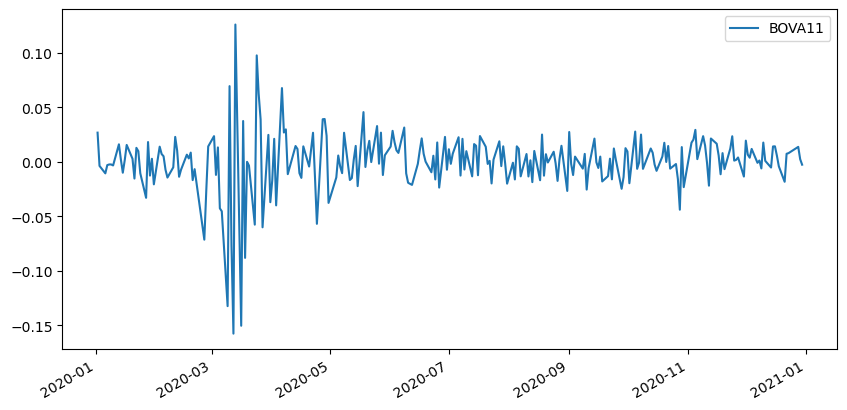

In [25]:
brasa.get_returns("BOVA11", start=datetime(2020, 1, 1), end=datetime(2020, 12, 31)).plot(figsize=(10, 5))

In [26]:
rets = brasa.get_returns("BOVA11", start=datetime(2021, 1, 1), end=datetime(2021, 12, 31))

In [27]:
rets.loc[rets.BOVA11.isna()]

,BOVA11


In [29]:
rets = brasa.get_returns(["DI1T252"], calendar="B3")
rets.loc[rets.DI1T252.isna()]

,DI1T252


In [30]:
symbol = "MGLU3"
rets = brasa.get_returns(symbol)
rets.loc[rets[symbol].isna()]

,MGLU3


,DIVO11
2012-02-15,NaN
2012-02-16,NaN
2012-02-17,NaN
2012-02-22,NaN
2012-04-16,NaN
2012-04-17,NaN


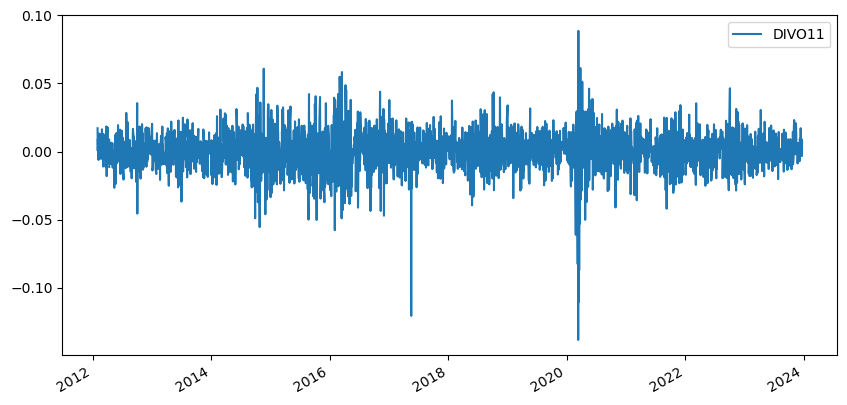

In [10]:
symbol = "DIVO11"
rets = brasa.get_returns(symbol)
rets.plot(figsize=(10, 5))
rets.loc[rets[symbol].isna()]